# Tutorial: Finding the Sweet Spot: A Visual Approach

Di subchapter sebelumnya, kita menghasilkan sebuah visualisasi yang sangat kuat: **Learning Curve**. Plot ini adalah peta kita untuk menavigasi antara model yang terlalu sederhana (underfitting) dan model yang terlalu rumit (overfitting).

Di notebook ini, kita akan fokus pada cara **membaca dan menginterpretasikan** learning curve tersebut untuk membuat keputusan yang tepat tentang kompleksitas model kita. Tujuannya adalah menemukan "sweet spot" atau "titik manis" di mana model kita berkinerja paling baik pada data yang belum pernah dilihatnya.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Mereproduksi dan membaca sebuah *learning curve* yang memplot error pelatihan vs. error pengujian.
* Mengidentifikasi tiga zona utama pada learning curve: underfitting, good fit, dan overfitting.
* Menentukan derajat polinomial yang optimal berdasarkan titik di mana error pengujian mencapai nilai minimumnya.
* Memahami mengapa meminimalkan error pelatihan saja adalah strategi yang keliru.


---
### 2. Recap: Menghasilkan Data Error

Mari kita jalankan kembali kode dari subchapter sebelumnya untuk menghasilkan data `train_errors` dan `test_errors`. Ini adalah data yang akan kita gunakan untuk membuat dan menganalisis learning curve.


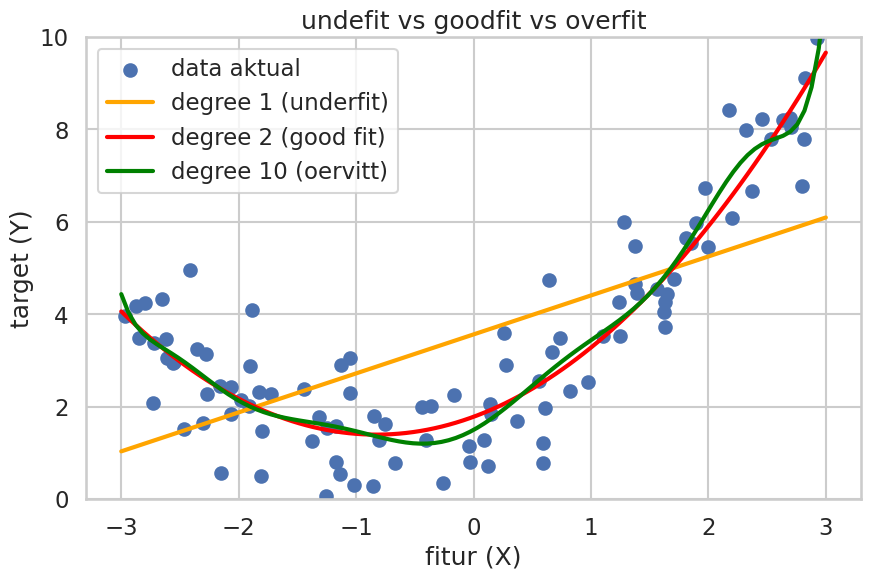

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear yang sama
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

def plot_poly_model(degree, color, label):
    model = Pipeline(
        [
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
            ('lin_reg', LinearRegression())
        ]
    )
    model.fit(X,Y)
    X_new = np.linspace(-3,3,100).reshape(100,1)
    Y_pred = model.predict(X_new)
    plt.plot(X_new, Y_pred, color=color, linewidth=3, label=label)

# visualisasi

plt.figure(figsize=(10,6))
plt.scatter(X,Y,label='data aktual')

plot_poly_model(1,'orange','degree 1 (underfit)')
plot_poly_model(2,'red','degree 2 (good fit)')
plot_poly_model(10,'green','degree 10 (oervitt)')

plt.legend()
plt.title("undefit vs goodfit vs overfit", fontsize=18)
plt.xlabel("fitur (X)")
plt.ylabel("target (Y)")
plt.ylim(0,10)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. loop melalui berbagai derajat polinomial
train_errors = []
test_errors = []

degrees = range(1,21)

for degree in degrees:
    model = Pipeline(
        [
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
            ('lin_reg', LinearRegression())
        ]
    )
    model.fit(X_train,Y_train)

    # error train
    Y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    train_errors.append(train_rmse)

    # error test
    Y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    test_errors.append(test_rmse)

---
### 3. Plotting dan Menganalisis Learning Curve

Sekarang kita plot kedua daftar error tersebut terhadap derajat polinomial.


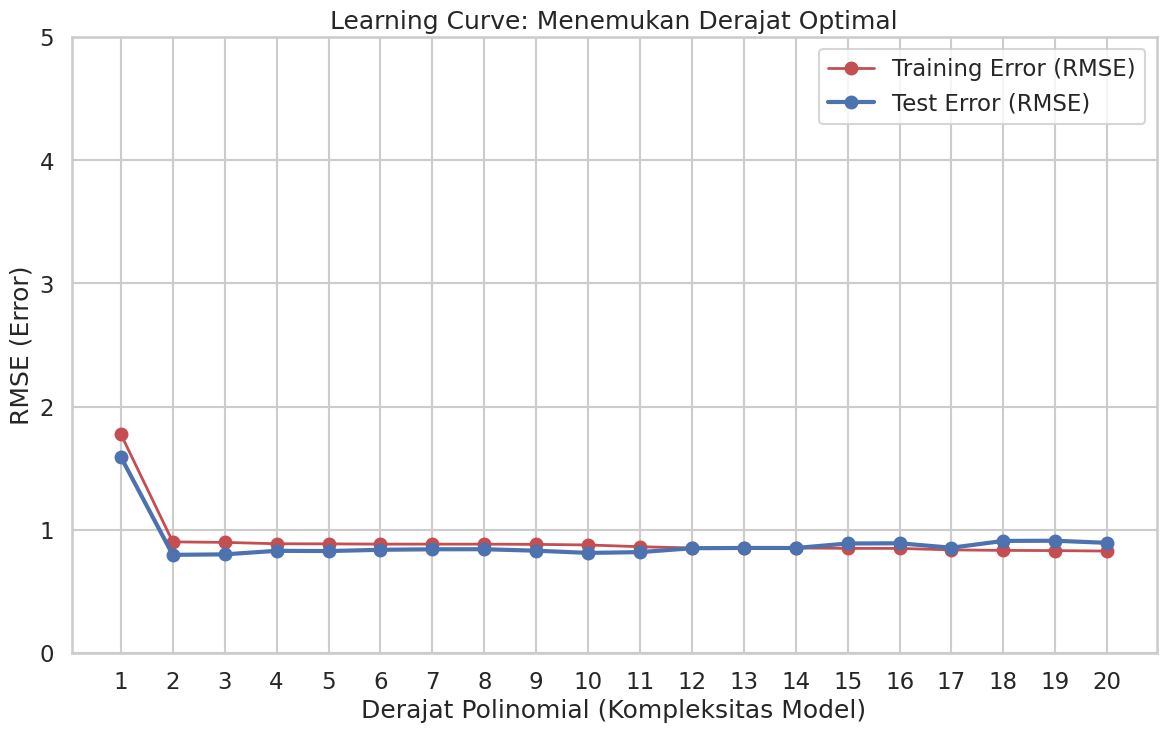

In [17]:
# Plot Learning Curve: Train vs Test RMSE per degree
plt.figure(figsize=(14, 8))
plt.plot(degrees, train_errors, "r-o", linewidth=2, label="Training Error (RMSE)")
plt.plot(degrees, test_errors, "b-o", linewidth=3, label="Test Error (RMSE)")

plt.xlabel("Derajat Polinomial (Kompleksitas Model)")
plt.ylabel("RMSE (Error)")
plt.title("Learning Curve: Menemukan Derajat Optimal", fontsize=18)
plt.legend()
plt.xticks(degrees)
plt.ylim(0, 5)  # Batasi sumbu y untuk fokus pada area yang relevan
plt.grid(True, which='both')
plt.show()

---
### 4. Membedah Plot: Tiga Zona Kinerja

Mari kita analisis plot ini bagian per bagian:

#### **Zona A: Underfitting (Derajat Rendah, misal 1)**
* **Observasi:** Garis merah (Training Error) dan garis biru (Test Error) sama-sama **tinggi**.
* **Arti:** Modelnya terlalu sederhana. Ia bahkan tidak bisa menangkap pola pada data pelatihan yang sudah dilihatnya, sehingga tentu saja ia juga buruk pada data pengujian. Kinerja buruknya konsisten.

#### **Zona C: Overfitting (Derajat Tinggi, misal > 10)**
* **Observasi:** Garis merah (Training Error) **sangat rendah** dan terus menurun. Sementara itu, garis biru (Test Error) **tinggi** dan terus menanjak. Celah (*gap*) di antara kedua garis ini sangat lebar.
* **Arti:** Modelnya terlalu kompleks. Ia telah "menghafal" data pelatihan dengan sempurna (error rendah), tetapi karena ia juga menghafal *noise*, ia gagal total saat mencoba menggeneralisasi pada data pengujian (error tinggi).

#### **Zona B: "The Sweet Spot" (Derajat Optimal)**
* **Observasi:** Ini adalah titik di mana garis biru (Test Error) mencapai **nilai minimumnya**. Setelah titik ini, error pengujian mulai naik lagi.
* **Arti:** Di sinilah kita menemukan **keseimbangan terbaik** antara bias dan varians. Modelnya cukup kompleks untuk menangkap pola sinyal yang sebenarnya, tetapi tidak terlalu kompleks sehingga mulai menghafal noise.

**Dalam plot kita, "sweet spot" ini berada di sekitar `degree=2` atau `degree=3`.** Di titik ini, kita mendapatkan performa terbaik pada data yang belum pernah dilihat, yang merupakan tujuan utama kita.


---
### 5. Membuat Keputusan Berbasis Data

Berdasarkan analisis visual dari learning curve, kita dapat dengan percaya diri menyimpulkan:

> **Model Polinomial dengan derajat 2 adalah pilihan terbaik untuk masalah ini.**

Meskipun model dengan derajat 20 akan memberikan error yang lebih rendah pada *data pelatihan*, kita tahu bahwa itu adalah ilusi. Model dengan derajat 2 akan berkinerja jauh lebih baik dan lebih andal di dunia nyata.

Mari kita temukan nilai error minimum secara numerik untuk mengkonfirmasi.


In [24]:
# tentukan derajat dengan test error terendah
best_degree_index = np.argmin(test_errors)
print(f'best_degree_index = {best_degree_index}')

best_degree = degrees[best_degree_index]
print(f'best_degree = {best_degree}')

min_test_error = test_errors[best_degree_index]
print(f'min_test_error = {min_test_error:.4f}')

best_degree_index = 1
best_degree = 2
min_test_error = 0.7974


---
### Kesimpulan

* Learning curve adalah alat diagnostik visual yang sangat diperlukan untuk memilih kompleksitas model.
* **Jangan pernah memilih model hanya berdasarkan performanya pada data pelatihan.** Itu adalah jalan menuju overfitting.
* Tujuan kita adalah untuk **meminimalkan error pada data pengujian (atau validasi)**.
* Pendekatan visual ini memberi kita cara yang kuat dan intuitif untuk menemukan "sweet spot" dan membangun model yang dapat menggeneralisasi dengan baik.
